In [1]:
import mxnet as mx
import matplotlib as mpl
import matplotlib.pyplot as plt
import gluoncv
from gluoncv import data,model_zoo,utils
import sys
sys.path.insert(0,"../")
import gluonbook as gb

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 加载预训练模型

In [2]:
ctx = gb.try_gpu()
ctx

gpu(0)

In [9]:
ssd_pretrain = model_zoo.get_model('ssd_512_resnet50_v1_voc',pretrained=True,ctx=ctx)


## 预处理图像

In [10]:
im_frame = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')

117KB [00:00, 147.95KB/s]                                                                                              


In [12]:
x,img = data.transforms.presets.ssd.load_test(im_frame,short=512)
print("test img shape",x.shape)

test img shape (1, 3, 512, 512)


## 进行图片预测

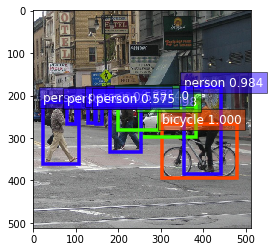

In [19]:
class_IDs,scores,bouding_box = ssd_pretrain(x.as_in_context(ctx))

plt.figure(figsize=(15,15))
utils.viz.plot_bbox(img,bouding_box[0],scores[0],
                   class_IDs[0],class_names=ssd_pretrain.classes)


plt.show()